# Telco Churn Classification Project
### Tyler Applegate     -     Florence Cohort     -     2021.06.01

In [1]:
# general imports
import pandas as pd
import numpy as np
import os
import scipy.stats as stats

# my specific imports
import acquire
import prepare
import explore

# acquire imports
from env import host, user, password

# prepare imports
from sklearn.model_selection import train_test_split

# explore imports
import matplotlib.pyplot as plt
import seaborn as sns

# model and evaluate imports
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

### Project Planning

- Create a README.md ith project and business goals, as well as data dictionay and initial hypothoses.
- Create a function (or functions) to automate the process of connecting to the Codeup Database, and acquiring the telco_churn dataframe.
- Save these functions to aquire.py so they can be imported into the final_report notebook.
- Create a series of functions to automate the process of cleaning and preparing the newly acquired telco_churn dataframe to get it ready for the exploratory, modeling, and MVP stages of the pipeline.
- Save these functions to prepare.py so they can be imported into the final_report notebook.
- Clearly define at least two hypotheses, set an alpha, run necessary statistical testing, reject, or fail to reject each null hypothesis, and document findings are key takeaways.
- Establish a baseline accuracy, model improvement goals.
- Train at least 3 different classification models.
- Evaluate these models on the train, and validate data sets.
- Choose the best model to evaluate on the test dataset.
- Create a csv file with the customer id, churn prediction, and actual churn.
- Document takeways, key findings, conclusions, and next steps in the final report notebook.

### Executive Summary - Conclusion & Next Steps
- I found that my Decision Tree and Random Forest models each outperformed my baseline accuracy of 73%
- The features I chose to focus on were:
    - m2m
    - auto-pay
    - fiber
    - has internet
    - monthly charges
- I chose my Random Forest Classifier because it performed the best on my validate dataset. It also slightly improved accuracy (73-77%), and greatly improved recall (0-46%).
- More time is needed to study why fiber internet users are churning at such a high rate, and how our incentive program(s) is/are working

### Data Acquisition

In [2]:
# connect to Codeup Database and read in telco_churn to a DataFrame
df = acquire.get_telco_data()

In [3]:
# let's see what we're working with
acquire.overview(df)

This dataframe has 7043 rows and 24 columns.
----------------------------------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-nu

### Data Acquisition - Key Findings and Takeaways:
- Always remember to push up the .gitignore first, to keep login credentials private/secure
- The get_connection function will work for any database in the Codeup database (IF you have login credentials.)
    - If you do not, this function can be adjusted to work with whatever database you do have credentials for
- The new_telco_data function is great for this project, and can be tweaked to work for others...
    - Always test of the sql_query in Sequal Ace first!!!!!
    - This query can be as simple of complex as you need it to be
- The get_telco_data function is a wonderful time saver / effeciency optimisor
    - The function will first look to see if there is a .csv of the db stored locally, and open it if available
    - If not, it will run the new_telco_data function to acquire the telco_churn, and store it to the local
- The overview function is a great way to get a bird's eye view of the dataset
- This dataset is 7043 rows, by 24 columns.
- At first glance, there do not appear to be any missing values.

### Data Preparation

In [4]:
# reassign the df variable using my prep_1_telco function
df = prepare.prep_1_telco(df)
# what does the new df look like?
df.info()
# I chose to add new columns, before deleting/altering existing ones, so that I could double-check my work,
# and have a fallback/restart point if necessary in the future

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0016-QLJIS to 9986-BONCE
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7032 non-null   int64  
 1   internet_service_type_id  7032 non-null   int64  
 2   contract_type_id          7032 non-null   int64  
 3   gender                    7032 non-null   object 
 4   senior_citizen            7032 non-null   int64  
 5   partner                   7032 non-null   object 
 6   dependents                7032 non-null   object 
 7   tenure                    7032 non-null   int64  
 8   phone_service             7032 non-null   object 
 9   multiple_lines            7032 non-null   object 
 10  online_security           7032 non-null   object 
 11  online_backup             7032 non-null   object 
 12  device_protection         7032 non-null   object 
 13  tech_support              7032 non-null   object 
 14

In [5]:
# now I'm going to use my prep_2_telco function to delete duplicate/extraneous columns
df = prepare.prep_2_telco(df)
# what does it look like now?
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0016-QLJIS to 9986-BONCE
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   senior_citizen   7032 non-null   int64  
 1   monthly_charges  7032 non-null   float64
 2   total_charges    7032 non-null   float64
 3   auto_pay         7032 non-null   int64  
 4   dsl              7032 non-null   int64  
 5   fiber            7032 non-null   int64  
 6   has_internet     7032 non-null   int64  
 7   m2m              7032 non-null   int64  
 8   one_year         7032 non-null   int64  
 9   two_year         7032 non-null   int64  
 10  has_contract     7032 non-null   int64  
 11  is_male          7032 non-null   int64  
 12  has_partner      7032 non-null   int64  
 13  has_dep          7032 non-null   int64  
 14  tenure_months    7032 non-null   int64  
 15  has_phone        7032 non-null   int64  
 16  multi_phone      7032 non-null   int64  
 17  has_

In [6]:
# let's split the data into train, validate, and test groups
train, validate, test = prepare.split_data(df)
# what doe each of these dataframes look like?
print(f'   train: {train.shape}')
print(f'validate: {validate.shape}')
print(f'    test: {test.shape}')

   train: (3937, 25)
validate: (1688, 25)
    test: (1407, 25)


### Data Preparation - Key Findings and Takeaways
- Starting out with a dataframe that is 7043 rows by 24 columns with no null values
- The prep_1_telco function takes the existing dataframe, and generates new columns to convert objects into numerical values
    - It also searches for whitespace, and replaces with NaN value, and in this case, drops those 11 rows
    - I chose to drop the 11 rows that were so new, they had yet to receive a bill, and thus did not have a total charge
    - Since they represented 11/7043 or 0.0015% of the dataframe, there is no issue with data integrity
- The prep_2_telco function drops all object and duplicate columns, to give the fewest number of columns
- The split_data function takes the df and splits into a train, validate, and test set
    - To replicate, please use the same random state of 1221, and stratify on 'has_churn'

### Data Exploration

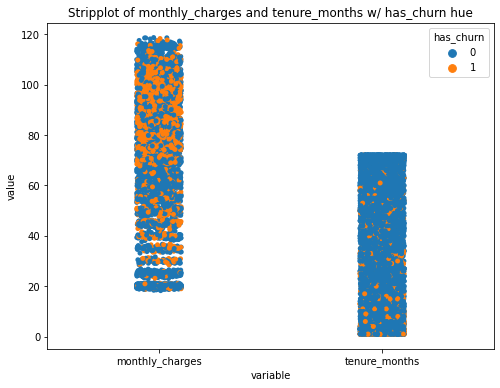

In [7]:
# let's melt the data, so we can get some fancy vizuals
melt = explore.telco_melt(df)
explore.telco_strip(melt)

###### Stripplot Takeaways
- It appears there is a relationship between monthly charges and churn
- This is not a good visual for observing potential relationship between tenure and churn

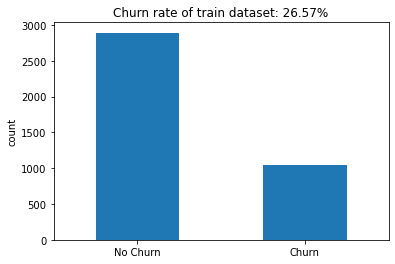

In [8]:
# overall churn rate of train dataset
churn_rate = train['has_churn'].mean()
tcr = train['has_churn'].value_counts().plot.bar()
plt.title(f'Churn rate of train dataset: {churn_rate:.2%}')
plt.xticks(ticks=[0,1], labels=['No Churn', 'Churn'], rotation=0)
plt.ylabel('count')
plt.show()

##### Bar chart takeaways
- In the train dataset, roughly 1 in 4 users churns
- This means our baseline model of guessing no one churns is 73.43% Accurate
- And baseline has a recall rate of 0%

### Statistical testing

##### Hypothesis 1
- alpha = 0.05
- ${H_O}$: There is no difference in churn rate between month-to-month and contracted users
- ${H_a}$: There is a statistically significant difference in churn rate between month-to-month and contracted users

In [9]:
alpha = 0.05
observed = pd.crosstab(train['has_churn'], train['m2m'])
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print(f'The p-value is less than the alpha: {p < alpha}')

chi^2 = 632.7017
p     = 0.0000
The p-value is less than the alpha: True


##### Conclusion
- We reject ${H_O}$ that churn rate is the same for month-to-month and contracted users

##### Takeaway
- M2M will be a useful feature for my model

##### Hypothesis 2
- alpha = 0.05
- ${H_O}$: Monthly charges have no impact on churn rate (they are independent variables)
- ${H_a}$: There is a statistically significant relationship between monthly charges and churn rate

In [10]:
churn_rate = train['has_churn'].mean()
t, p = stats.ttest_1samp(df['monthly_charges'], churn_rate)
print('tscore:', t.round(2))
print('p/2:   ', p/2)
print(f'The p-value is less than the alpha: {p < alpha}')

tscore: 179.87
p/2:    0.0
The p-value is less than the alpha: True


##### Conclusion
- We reject ${H_O}$ that monthly charges have no impact on churn rate

##### Takeaway
- Monthly charges will also be useful in model building

##### What other features will be useful for model building?

In [11]:
# this function will run chi^2 test on each categorical variable against has_churn
explore.telco_cat_chi(train)

senior_citizen
chi^2 = 114.5890
p     = 0.0000
--------------------------------
auto_pay
chi^2 = 164.2553
p     = 0.0000
--------------------------------
dsl
chi^2 = 63.2535
p     = 0.0000
--------------------------------
fiber
chi^2 = 398.3547
p     = 0.0000
--------------------------------
has_internet
chi^2 = 217.2718
p     = 0.0000
--------------------------------
m2m
chi^2 = 632.7017
p     = 0.0000
--------------------------------
one_year
chi^2 = 131.1002
p     = 0.0000
--------------------------------
two_year
chi^2 = 338.5036
p     = 0.0000
--------------------------------
has_contract
chi^2 = 632.7017
p     = 0.0000
--------------------------------
is_male
chi^2 = 1.9712
p     = 0.1603
--------------------------------
has_partner
chi^2 = 68.2426
p     = 0.0000
--------------------------------
has_dep
chi^2 = 89.8354
p     = 0.0000
--------------------------------
has_phone
chi^2 = 0.0721
p     = 0.7884
--------------------------------
multi_phone
chi^2 = 5.4421
p     = 0.0197


##### Chi^2 Takeaways
- Strong (Chi^2 > 150)
    - auto-pay, fiber, has_internet, m2m, two_year, has_contract    
- Moderate (Chi^2 > 100)
    - senior_citizen, one_year, has_security, has_support, has_paperless
- Low (Chi^2 > 50)
    - dsl, has_partner, has_dep,
- DO NOT USE
    - is_male, has_phone, multi_phone, has_backup, has_protection, stream_tv, stream_movies 

In [12]:
# this function will run a ttest of each continuous variable against has_churn
explore.telco_quant_ttest(df)

monthly_charges
tscore: 179.87
p/2:    0.0
alpha:  0.01
-------------------------------------
total_charges
tscore: 84.46
p/2:    0.0
alpha:  0.01
-------------------------------------
tenure_months
tscore: 109.86
p/2:    0.0
alpha:  0.01
-------------------------------------


##### T-test takeaways
- all 3 continuous variables have a strong enough tscore, and low enough p to be useful in model construction

### Data Exploration - Key Findings and Takeaways
- There appear to be many drivers of churn in the Telco dataset
- I will be able to build numerous models utilizing different columns
- With more time, I would combine some of the more extraneous columns to see if I could either
    - Get more utility out of them, or
    - Take up less space at minimum

## Model Building & Evaluation

### Baseline
- If I predict no churn (the most common outcome) for every observation, my accuracy would be 73.43% and my recall would be 0.00%
- Conversely, if I predict churn for every observation, my accuracy would be 26.57% and my recall would be 100%
- My goal is to keep baseline accuracy near 75%, while improving recall to at least 50%

In [13]:
# what is my baseline?
baseline = train['has_churn'].value_counts().nlargest(1) / train.shape[0]
print(f'My baseline accuracy is {round(baseline.values[0] * 100,2)}%.')

My baseline accuracy is 73.43%.


### MVP Models
- I am going to try Decision Tree, Random Forest, and KNN Classifiers with
    - m2m
    - auto-pay
    - fiber
    - has internet
    - monthly charges
- My goal is to beat, or maintain my 73% baseline accuracy, while improving my recall from 0% to at least 50%
- This will provide a bird's eye view of the performance of each classifier
- I will then either advance my best model to the next stage of feature engineering, or adjust hyperparameters until I have a satisfactory model
- The hyperparameters I will initially use are:
    - Decision Tree - max_depth 3
    - Random Forest - max_depth 3
    - KNN 
    - Random state of 1221 for repeatability

#### Define X_train, y_train, validate, and test datasets

In [14]:
# train
X_train = train[['m2m', 'auto_pay', 'fiber', 'has_internet', 'monthly_charges']]
y_train = train['has_churn']
# validate
X_validate = validate[['m2m', 'auto_pay', 'fiber', 'has_internet', 'monthly_charges']]
y_validate = validate['has_churn']
# test
X_test = test[['m2m', 'auto_pay', 'fiber', 'has_internet', 'monthly_charges']]
y_test = test['has_churn']

In [15]:
# Decision Tree
tree_1 = DecisionTreeClassifier(max_depth=3, random_state=1221)
tree_1.fit(X_train, y_train)
explore.model_performs(X_train, y_train, tree_1)


    Overall Accuracy:  77.52%

    True Positive Rate:  48.28%  
    True Negative Rate:  88.10%   
    False Positive Rate:  11.90%
    False Negative Rate:  51.72%

    ---------------------------------------------------
    

    Positive =  'Churn'

    Confusion Matrix:
    


,pred_no_churn,pred_churn
actual_no_churn,TN: 2547,FP: 344
actual_churn,FN: 541,TP: 505




    
    ---------------------------------------------------
    Classification Report:
    


,precision,recall,f1-score,support
no_churn,0.824806,0.881010,0.851982,2891.00000
churn,0.594817,0.482792,0.532982,1046.00000
accuracy,0.775210,0.775210,0.775210,0.77521
macro avg,0.709812,0.681901,0.692482,3937.00000
weighted avg,0.763701,0.775210,0.767228,3937.00000


In [16]:
# Random Forest
rf_1 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
#                             min_samples_leaf=3,
#                             n_estimators=10,
                            max_depth=3, 
                            random_state=1221)
rf_1.fit(X_train, y_train)
explore.model_performs(X_train, y_train, rf_1)


    Overall Accuracy:  77.62%

    True Positive Rate:  47.32%  
    True Negative Rate:  88.59%   
    False Positive Rate:  11.41%
    False Negative Rate:  52.68%

    ---------------------------------------------------
    

    Positive =  'Churn'

    Confusion Matrix:
    


,pred_no_churn,pred_churn
actual_no_churn,TN: 2561,FP: 330
actual_churn,FN: 551,TP: 495




    
    ---------------------------------------------------
    Classification Report:
    


,precision,recall,f1-score,support
no_churn,0.822943,0.885853,0.853240,2891.000000
churn,0.600000,0.473231,0.529129,1046.000000
accuracy,0.776226,0.776226,0.776226,0.776226
macro avg,0.711472,0.679542,0.691184,3937.000000
weighted avg,0.763711,0.776226,0.767129,3937.000000


In [17]:
# KNN - where to start?
for k in range(2, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_validate, y_validate)
    print(f'{k:2d}: {accuracy:.2%}')

 2: 73.22%
 4: 73.76%
 6: 74.82%
 8: 75.36%
10: 74.76%
12: 74.88%
14: 75.18%
16: 74.88%
18: 75.24%


In [18]:
knn_8 = KNeighborsClassifier(n_neighbors=8)
knn_8.fit(X_train, y_train)
explore.model_performs(X_train, y_train, knn_8)


    Overall Accuracy:  80.19%

    True Positive Rate:  43.12%  
    True Negative Rate:  93.60%   
    False Positive Rate:  6.40%
    False Negative Rate:  56.88%

    ---------------------------------------------------
    

    Positive =  'Churn'

    Confusion Matrix:
    


,pred_no_churn,pred_churn
actual_no_churn,TN: 2706,FP: 185
actual_churn,FN: 595,TP: 451




    
    ---------------------------------------------------
    Classification Report:
    


,precision,recall,f1-score,support
no_churn,0.819752,0.936008,0.874031,2891.00000
churn,0.709119,0.431166,0.536266,1046.00000
accuracy,0.801880,0.801880,0.801880,0.80188
macro avg,0.764436,0.683587,0.705149,3937.00000
weighted avg,0.790358,0.801880,0.784292,3937.00000


In [19]:
explore.compare(tree_1, rf_1, X_train, y_train)


    ******       Model 1  ******                                ******     Model 2  ****** 
       Overall Accuracy:  77.52%              |                Overall Accuracy:  77.62%  
                                                
     True Positive Rate:  48.28%              |          The True Positive Rate:  47.32%  
    False Positive Rate:  11.90%              |         The False Positive Rate:  11.41% 
     True Negative Rate:  88.10%              |          The True Negative Rate:  88.59% 
    False Negative Rate:  51.72%              |         The False Negative Rate:  52.68%

    _____________________________________________________________________________________________________________
    

    Positive =  'Churn'

    Confusion Matrix
    


,pred_no_churn,pred_churn
actual_no_churn,TN: 2547,FP: 344
actual_churn,FN: 541,TP: 505
,pred_no_churn,pred_churn
actual_no_churn,TN: 2561,FP: 330
actual_churn,FN: 551,TP: 495




    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
no_churn,0.824806,0.881010,0.851982,2891.000000
churn,0.594817,0.482792,0.532982,1046.000000
accuracy,0.775210,0.775210,0.775210,0.775210
macro avg,0.709812,0.681901,0.692482,3937.000000
weighted avg,0.763701,0.775210,0.767228,3937.000000
,precision,recall,f1-score,support
no_churn,0.822943,0.885853,0.853240,2891.000000
churn,0.600000,0.473231,0.529129,1046.000000
accuracy,0.776226,0.776226,0.776226,0.776226
macro avg,0.711472,0.679542,0.691184,3937.000000


In [20]:
print(f'Decision Tree training score: {tree_1.score(X_train, y_train):.2%}')
print(f'Decision Tree validate score: {tree_1.score(X_validate, y_validate):.2%}')
print('')
print(f'Random Forest training score: {rf_1.score(X_train, y_train):.2%}')
print(f'Random Forest validate score: {rf_1.score(X_validate, y_validate):.2%}')
print('')
print(f'KNN training score: {knn_8.score(X_train, y_train):.2%}')
print(f'KNN validate score: {knn_8.score(X_validate, y_validate):.2%}')

Decision Tree training score: 77.52%
Decision Tree validate score: 77.49%

Random Forest training score: 77.62%
Random Forest validate score: 78.02%

KNN training score: 80.19%
KNN validate score: 75.36%


#### MVP Models - Key Findings and Takeaways
- All three models improve upon baseline accuracy of 73%
- They also have a recall score around 50%
- Because they are similar, and KNN is the most computationally expensive, I am going to eliminate this model
- I am going to go with Random Forest since it performs the best on my validate dataset

### Test My Best Model
- I will be testing rf_1 since it performs the best on validate

In [21]:
actual_test = y_test
predicted_test = rf_1.predict(X_test)
explore.model_performs(X_test, y_test, rf_1)


    Overall Accuracy:  76.62%

    True Positive Rate:  46.26%  
    True Negative Rate:  87.61%   
    False Positive Rate:  12.39%
    False Negative Rate:  53.74%

    ---------------------------------------------------
    

    Positive =  'Churn'

    Confusion Matrix:
    


,pred_no_churn,pred_churn
actual_no_churn,TN: 905,FP: 128
actual_churn,FN: 201,TP: 173




    
    ---------------------------------------------------
    Classification Report:
    


,precision,recall,f1-score,support
no_churn,0.818264,0.876089,0.846190,1033.000000
churn,0.574751,0.462567,0.512593,374.000000
accuracy,0.766169,0.766169,0.766169,0.766169
macro avg,0.696507,0.669328,0.679391,1407.000000
weighted avg,0.753535,0.766169,0.757515,1407.000000


#### Best Model - Key Findings and Takeaways
- Slightly improves accuracy from 73% to 77%
- Improves recall from 0% to 46%
- With more time, I would like to explore hyperparameters to continue to improve recall score of this model

#### Create the Predictions CSV
- Create a CSV file with the probability of class, prediction of churn (1=churn, 0=no_churn)

In [22]:
# mapping my Random Forest probabilities into a DataFrame
proba_test = rf_1.predict_proba(X_test)
proba_df = pd.DataFrame(proba_test, columns=rf_1.classes_.tolist())

In [23]:
# reseting index on my test DataFrame
reset_test = test.reset_index()

In [24]:
# concat these DataFrames...
test_proba_df = pd.concat([reset_test, proba_df], axis=1)

In [25]:
# adding my prediction column
test_proba_df['prediction'] = predicted_test

In [26]:
# final DataFrame to turn in...
telco_final = test_proba_df[['customer_id', 1, 'prediction']]

In [27]:
# save to csv
telco_final.to_csv('telco_final.csv')

### Conclusion

#### Key Findings and Takeaways
- There are many drivers of churn in the Telco Dataset
- There is no single "smoking gun" driver
- The top drivers are:
    - m2m
    - auto-pay
    - fiber
    - has internet
    - monthly charges
    
I chose my Random Forest Classifier because it had the best performance between my train and validate sets, as well as a slight improvment in overall accuracy, and a huge improvement in recall.

#### Recommendations & Next Steps
- Identify likely churners and proactively offer incentives to get them to sign a contract and/or convert to auto-pay
- Implement a study to see why the churn rate of fiber optic internet users is so high
    - Are we overpromising and underdelivering?
    - Is the reliability questionabile?
    - Are we priced competetively?
- Adjust hyperparameters to fine-tune model
- Create a metric to judge our incentive program(s) moving forward
- Set check-in dates to monitor our progress

